# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Ngô Quốc Quý
- MSSV: 21127679
- Lớp: 21CLC08

# Import

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
# import seaborn as sns   
# Import thêm dữ thư viện nếu cần

# Đọc dữ liệu

In [2]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa các đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa các đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [3]:
# Cài đặt các hàm cần thiết ở đây
class OLSLinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y

        return self

    def get_params(self):
        return self.w


    def predict(self, X):
        return np.sum(self.w.ravel() * X, axis=1)   

def mae(y, y_hat):
    return np.mean(np.abs(y.ravel() - y_hat.ravel()))

def cross_validation(X, y, k):
    size_test = int(len(X) / k)
    temp_X = np.array(X)
    temp_y = np.array(y)
    new_X_test = []
    new_X_train = []
    new_y_test = []
    new_y_train = []
    scores = 0
    for i in range(k):
        data_test_X, data_test_y = temp_X[i*size_test:(i+1)*size_test], temp_y[i*size_test:(i+1)*size_test]
        data_train_X, data_train_y = temp_X[:i*size_test], temp_y[:i*size_test]
        data_train_X = np.append(data_train_X, temp_X[:(i+1)*size_test])
        data_train_y = np.append(data_train_y, temp_y[:(i+1)*size_test])
        new_X_test.append(data_test_X)
        new_X_train.append(data_train_X)
        new_y_test.append(data_test_y)
        new_y_train.append(data_train_y)

    new_X_test = np.array(new_X_test)
    new_X_train = np.array(new_X_train)
    new_y_test = np.array(new_y_test)
    new_y_train = np.array(new_y_train)
    
    for i in range(k):
        test_X = pd.DataFrame(new_X_test[i], columns=['col'])
        train_X = pd.DataFrame(new_X_train[i], columns=['col'])
        test_y = pd.DataFrame(new_y_test[i], columns=['Salary'])
        train_y = pd.DataFrame(new_y_train[i], columns=['Salary'])
        test_y = test_y.iloc[:, -1]
        train_y = train_y.iloc[:, -1]
        test_X, train_X
        md = OLSLinearRegression().fit(train_X, train_y)
        # md.get_params()
        y_pred = md.predict(test_X)
        scores += mae(test_y, y_pred)
    return scores / k


# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên 'Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree', 'collegeGPA', 'CollegeCityTier', 'English', 'Logical', 'Quant', 'Domain' (2 điểm) 

In [4]:
# Phần code cho yêu cầu 1a
temp_X_train = train.iloc[:, :11]
temp_X_test = test.iloc[:, :11]
model = OLSLinearRegression().fit(temp_X_train, y_train)
model.get_params()
# print(type(temp_X_train))

0    -22756.512821
1       804.503156
2      1294.654565
3    -91781.897531
4     23182.388679
5      1437.548672
6     -8570.661985
7       147.858299
8       152.888476
9       117.221846
10    34552.286221
dtype: float64

In [5]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
y_hat = model.predict(temp_X_test)
print("MAE: ", mae(y_test, y_hat))

MAE:  104863.7775403339


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -22756.513*Gender + 804.503*{10}percentage + 1294.654*{12}percentage + (-91781.898)*ColloegeTier + 23182.389*Degree + 1437.549*collegeGPA + (-8570.662)*CollegeCityTier + 147.858*Englist + 152.888*Logical + 117.223*Quant + 34552.286*Domain   

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [6]:
# Phần code cho yêu cầu 1b
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

#get features
X = train.iloc[:, -6:-1]
scores = []

idx = 1
for column_name in X.columns:
    dataset = train.copy()
    dataset.sample(frac = 1)
    X = dataset.iloc[:, -6:-1]
    y = dataset.iloc[:, -1]
    feature_X = X.iloc[:, idx-1:idx]
    score = cross_validation(feature_X, y, k=5)
    scores.append([column_name, score])
    idx+=1

min_mae = scores[0]
for mae_ in scores:
    if min_mae[1] > mae_[1]:
        min_mae = mae_

print("Best MAE: ", min_mae)
df = pd.DataFrame(scores, columns=['Features', 'MAE'])
df

Best MAE:  ['nueroticism', 298887.0886000371]


C:\Users\quynq\AppData\Local\Temp\ipykernel_19792\1337639410.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_X_train = np.array(new_X_train)
C:\Users\quynq\AppData\Local\Temp\ipykernel_19792\1337639410.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_y_train = np.array(new_y_train)
C:\Users\quynq\AppData\Local\Temp\ipykernel_19792\1337639410.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you

,Features,MAE
0,conscientiousness,306289.197791
1,agreeableness,301253.719611
2,extraversion,306851.585531
3,nueroticism,298887.088600
4,openess_to_experience,303104.430081


In [7]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
best_X_train = train[min_mae[0]].to_frame()
temp_X_test = test[min_mae[0]].to_frame()
temp_y_train = y_train.copy()
temp_y_test = y_test.copy()
best_personality_feature_model = OLSLinearRegression().fit(best_X_train, temp_y_train)
best_personality_feature_model.get_params()

0   -56546.303753
dtype: float64

In [8]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model
y_hat = best_personality_feature_model.predict(temp_X_test)
best_mae = mae(temp_y_test, y_hat)
print("Best mae in best_personality_feature_model: ", best_mae)

Best mae in best_personality_feature_model:  291019.693226953


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -56546.304*Nueroticism$$ 

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng 'English', 'Logical', 'Quant', tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [9]:
# Phần code cho yêu cầu 1c
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu
X = train.iloc[:, 7:10]
scores = []

idx = 1
for column_name in X.columns:
    dataset = train.copy()
    dataset.sample(frac = 1)
    X = dataset.iloc[:, 7:10]
    y = dataset.iloc[:, -1]
    feature_X = X.iloc[:, idx-1:idx]
    score = cross_validation(feature_X, y, k=5)
    scores.append([column_name, score])
    idx+=1

min_mae = scores[0]
for mae_ in scores:
    if min_mae[1] > mae_[1]:
        min_mae = mae_

print("Best MAE: ", min_mae)
df = pd.DataFrame(scores, columns=['Features', 'MAE'])
df

Best MAE:  ['Quant', 116613.7924310602]


C:\Users\quynq\AppData\Local\Temp\ipykernel_19792\1337639410.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_X_train = np.array(new_X_train)
C:\Users\quynq\AppData\Local\Temp\ipykernel_19792\1337639410.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_y_train = np.array(new_y_train)
C:\Users\quynq\AppData\Local\Temp\ipykernel_19792\1337639410.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you

,Features,MAE
0,English,120550.735783
1,Logical,119198.663764
2,Quant,116613.792431


In [10]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
best_X_train = train[min_mae[0]].to_frame()
temp_X_test = test[min_mae[0]].to_frame()
temp_y_train = y_train.copy()
temp_y_test = y_test.copy()
best_personality_feature_model = OLSLinearRegression().fit(best_X_train, temp_y_train)
best_personality_feature_model.get_params()

0    585.895381
dtype: float64

In [11]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
y_hat = best_personality_feature_model.predict(temp_X_test)
best_mae = mae(temp_y_test, y_hat)
print("Best mae in best_personality_feature_model: ", best_mae)

Best mae in best_personality_feature_model:  106819.5776198967


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 585.895*Quant$$

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

In [12]:
# Trình bày các phần tìm ra mô hình
correlations = X_train.corr()
correlations = correlations.iloc[:, -1]
correlations = correlations.sort_values(ascending=False)
print(correlations)

openess_to_experience    1.000000
agreeableness            0.605813
extraversion             0.468572
conscientiousness        0.415984
Gender                   0.084511
English                  0.061630
ComputerProgramming      0.059650
ComputerScience          0.037363
Logical                  0.018907
CollegeCityTier          0.015314
10percentage             0.015292
Degree                   0.014351
collegeGPA               0.005078
MechanicalEngg          -0.005465
12percentage            -0.007928
Quant                   -0.009126
TelecomEngg             -0.011011
Domain                  -0.015629
CollegeTier             -0.019414
ElectronicsAndSemicon   -0.029846
CivilEngg               -0.030626
ElectricalEngg          -0.032293
nueroticism             -0.051393
Name: openess_to_experience, dtype: float64


<Axes: >

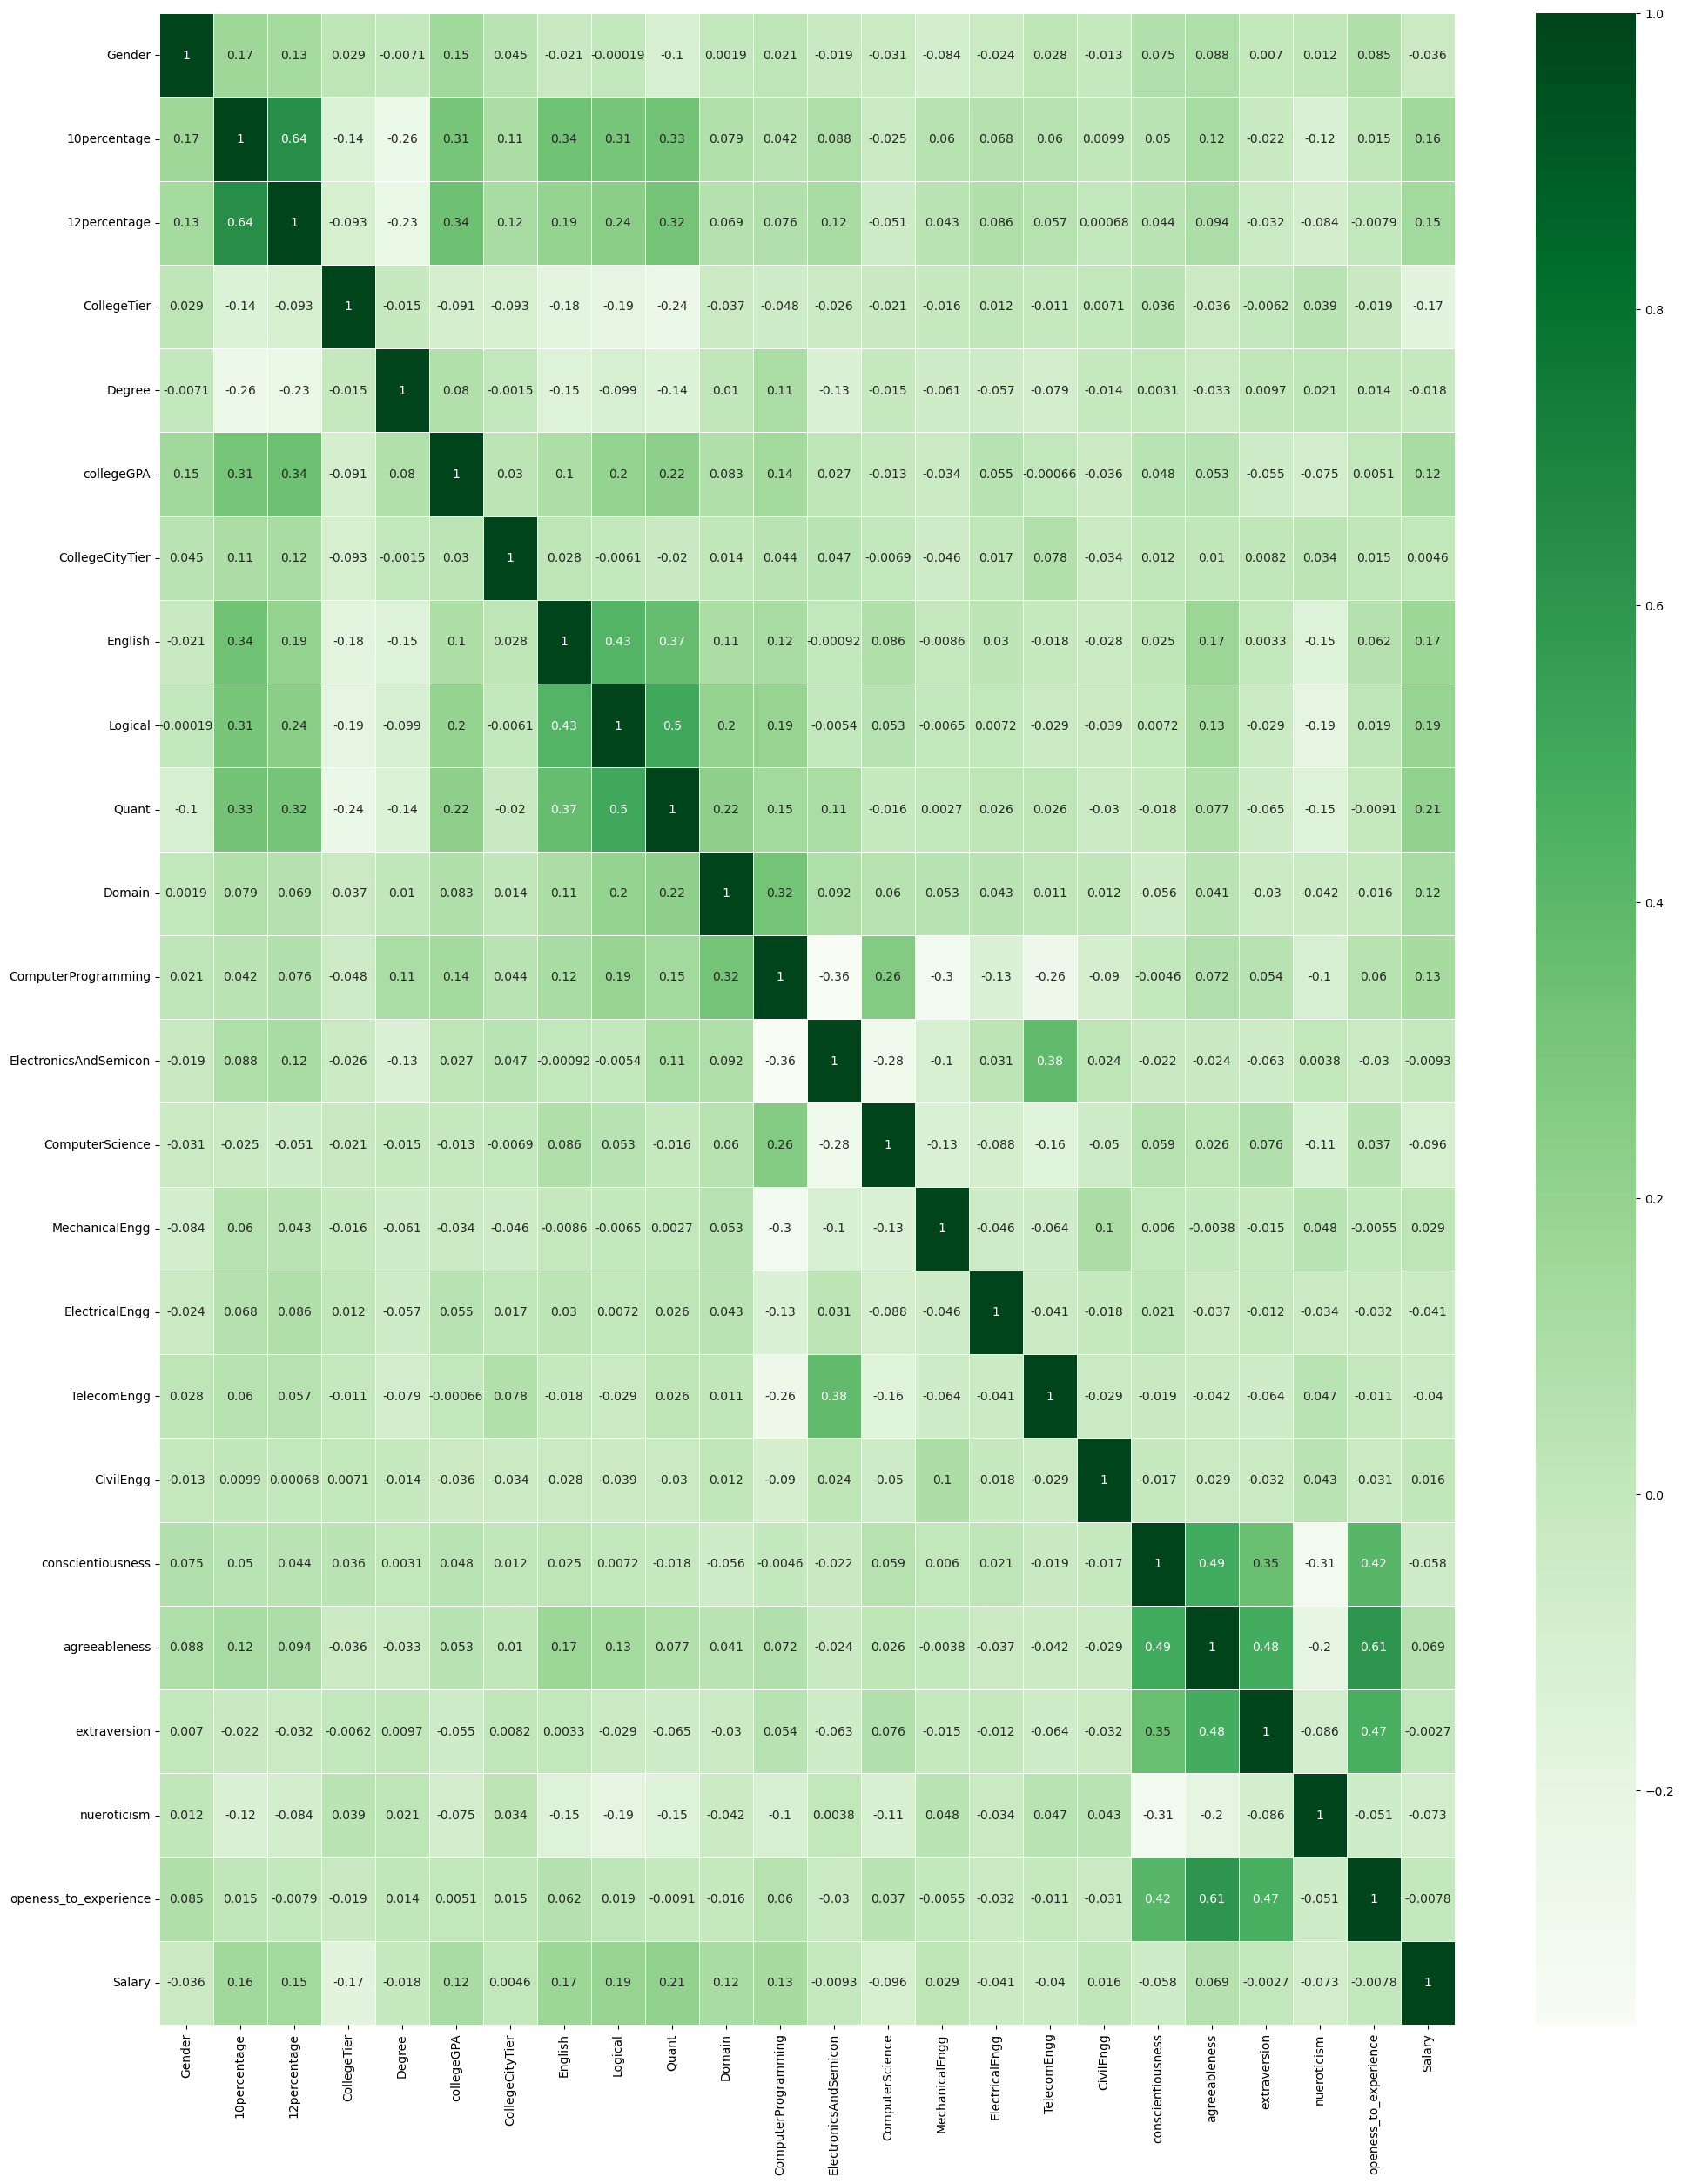

In [13]:
corr_matrix = train.corr()
fig, ax = plt.subplots(figsize=(24, 30))
sns.heatmap(corr_matrix,cmap="Greens", annot=True, linewidths=.5, ax = ax)

## Thử nghiệm, so sánh các mô hình

In [14]:
# Phần code cho yêu cầu 1d
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
# In ra các kết quả cross-validation như yêu cầu

new_lr = LinearRegression()
list_mae = []


# sử dụng 5 kết hợp đặc trưng Logical, English, Quant, Domain, ComputerProgramming
dataset = train.copy()
dataset.sample(frac = 1)
X1 = dataset.loc[:, ['Logical', 'English', 'Quant', 'Domain', 'ComputerProgramming']]
y1 = dataset.iloc[:, -1]

score1 = cross_val_score(new_lr, X1, y1, scoring='neg_mean_absolute_error', cv=5)

new_score1 = []
for score in score1:
    new_score1.append(-score)

list_mae.append(["model1", np.mean(new_score1)])



In [15]:
#sử dụng căn bậc 2 của đặc trưng kết hợp `10percentage`, `12percentage`, 
#`CollegeTier`, `Degree`, `collegeGPA`
dataset = train.copy()
dataset.sample(frac = 1)

y2 = dataset.iloc[:, -1]

for col_name in dataset.columns:
    dataset[col_name] = np.sqrt(dataset[col_name]).copy()

X2 = dataset.loc[:, ['10percentage', '12percentage', 'CollegeTier', 'Degree', 'collegeGPA']]


score2 = cross_val_score(new_lr, X2, y2, scoring='neg_mean_absolute_error', cv=5)
new_score2 = []
for score in score2:
    new_score2.append(-score)

list_mae.append(["model2", np.mean(new_score2)])


c:\Users\quynq\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
#sử dụng đặc trưng mới được tạo ra bằng cộng các đặc trưng '10percentage', '12percentage', 'collegeGPA'
temp_train = train.copy()

temp_train['sum_col'] = temp_train['10percentage'] + temp_train['12percentage'] + temp_train['collegeGPA']

X3 = temp_train.loc[:, ['sum_col']]
y3 = temp_train.loc[:, ['Salary']]

score3 = cross_val_score(new_lr, X3, y3, scoring='neg_mean_absolute_error', cv=5)

new_score3 = []
for score in score3:
    new_score3.append(-score)

list_mae.append(["model3", np.mean(new_score3)])


In [17]:
#
dataset = train.copy()
dataset.sample(frac = 1)
X4 = dataset.loc[:, ["Quant","CollegeTier","12percentage","English","collegeGPA"]]
y4 = dataset.iloc[:, -1]

score4 = cross_val_score(new_lr, X4, y4, scoring='neg_mean_absolute_error', cv=5)

new_score4 = []
for score in score4:
    new_score4.append(-score)

list_mae.append(["model4", np.mean(new_score4)])

In [18]:
min_mae = list_mae[0]
for mae_ in list_mae:
    if min_mae[1] > mae_[1]:
        min_mae = mae_

df = pd.DataFrame(list_mae, columns=['Mô hình', 'MAE'])
df

,Mô hình,MAE
0,model1,115355.777575
1,model2,117818.650588
2,model3,117828.404083
3,model4,114626.689800


In [19]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
my_best_train = train.loc[:, ["Quant","CollegeTier","12percentage","English","collegeGPA"]]
temp_X_test = test.loc[:, ["Quant","CollegeTier","12percentage","English","collegeGPA"]]
my_best_model = OLSLinearRegression().fit(my_best_train, y_train)
my_best_model.get_params()

0      206.501649
1   -82570.246621
2     1513.503236
3      209.366131
4     1992.911864
dtype: float64

In [20]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
y_hat = my_best_model.predict(temp_X_test)
print("MAE: ", mae(y_test, y_hat))

MAE:  104184.56578915539


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 206.502*Quant + (-82570)*CollegeTier + 1513.503*{12}percentage + 209.366*English + 1992.912*collegeGPA$$